## Predicting Customer Churn: Identifying Customers that are Susceptible to Churn

### Objective:
- To develop a predictive model that identifies customers who are likely to churn (i.e., stop using the - service), enabling the telecom - company to take proactive retention measures and reduce revenue loss.

### Business Problem:
- Customer churn is a critical issue in the telecom industry due to high competition and switching ease. Retaining existing customers is more - cost-effective than acquiring new ones. Predicting churn allows the company to:

- Understand key churn drivers.
- Target high-risk customers with offers or support.

- Improve customer satisfaction and loyalty.


Solution:
- A. Import required Library
- B. Data Collection
- C. Data Reprocessing
- D. Exploratory Data Analysis (EDA)
- E. Model Building
- F. Insight and Recommendation
- G. Using Strealit app




### A. Import the Required Library Packages.


In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


### B. Data Collection

In [502]:
df = pd.read_csv('Dataset.csv')

In [503]:
### first Top 5 Row of the Dataset
df.head(5)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [504]:
### Last Last 5 Row of the Dataset

df.tail(3)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
12480,13481,Lisa Rodgers,38,Male,East Erin,william37@example.com,951-489-9554,"56050 Steven Summit Suite 383\nJohnmouth, NM 2...",Segment C,"[{'Product': 'Furisode Kimonos', 'Frequency': ...",...,"[{'Type': 'Email', 'Date': '2020-05-22'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 26...","{'PageViews': 96, 'TimeSpent(minutes)': 1}","[{'Action': 'Search', 'Page': 'author', 'Times...","{'Logins': 9, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Offer particularly s...","[{'Email_Sent': '2020-05-18', 'Email_Opened': ...",1,1,2020-10-13 15:09:13
12481,13482,Kristin Carey,26,Female,New Leah,josephcarter@example.net,001-335-464-3236x722,"72356 Teresa Rapid\nPorterborough, SC 40076",Segment A,"[{'Product': 'Sequins & Glitter', 'Frequency':...",...,"[{'Type': 'Call', 'Date': '2020-09-11'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 30...","{'PageViews': 63, 'TimeSpent(minutes)': 2}","[{'Action': 'Click', 'Page': 'post', 'Timestam...","{'Logins': 2, 'Frequency': 'Monthly'}","{'Rating': 5, 'Comment': 'Rest something conce...","[{'Email_Sent': '2021-09-05', 'Email_Opened': ...",0,0,2020-06-24 23:49:01
12482,13483,Melissa Carter,29,Male,West Amanda,regina88@example.net,816-238-9247,USCGC Lopez\nFPO AE 85542,Segment C,"[{'Product': 'Pool Brushes & Brooms', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-02-17'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 11...","{'PageViews': 93, 'TimeSpent(minutes)': 6}","[{'Action': 'Add to Cart', 'Page': 'category',...","{'Logins': 6, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Indeed foot trouble ...","[{'Email_Sent': '2021-02-08', 'Email_Opened': ...",2,1,2022-07-14 07:27:52


### C. Data Processing

In [505]:
## Shape of the data row and colunms
df.shape

(12483, 21)

In [506]:
print(['Number of Row'],df.shape[0])
print(['Number of Colunm'],df.shape[1])

['Number of Row'] 12483
['Number of Colunm'] 21


In [507]:
## Columns names
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp'],
      dtype='object')

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [509]:
## Drop unneccessary colunms

df.drop(columns=['CustomerID','Name','Location','Email','Phone','Address','PurchaseHistory','SubscriptionDetails',
                'ServiceInteractions','PaymentHistory','WebsiteUsage','ClickstreamData','EngagementMetrics',
                'Feedback','MarketingCommunication','Timestamp'], inplace=True)

In [510]:
df

,Age,Gender,Segment,NPS,ChurnLabel
0,31,Male,Segment B,3,1
1,66,Female,Segment C,6,0
2,36,Female,Segment B,3,0
3,62,Female,Segment C,1,1
4,68,Female,Segment C,3,0
...,...,...,...,...,...
12478,55,Female,Segment A,8,0
12479,29,Male,Segment A,7,0
12480,38,Male,Segment C,1,1
12481,26,Female,Segment A,0,0


In [511]:
## Data Information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         12483 non-null  int64 
 1   Gender      12483 non-null  object
 2   Segment     12483 non-null  object
 3   NPS         12483 non-null  int64 
 4   ChurnLabel  12483 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 487.7+ KB


In [512]:
## Handling Missing/Null Value

df.isnull().sum()

Age           0
Gender        0
Segment       0
NPS           0
ChurnLabel    0
dtype: int64

In [513]:
## Ovarall statistic of our dataset
df.describe()

,Age,NPS,ChurnLabel
count,12483.000000,12483.000000,12483.000000
mean,43.930065,2.973884,0.505808
std,15.341521,2.644623,0.499986
min,18.000000,0.000000,0.000000
25%,31.000000,1.000000,0.000000
50%,44.000000,2.000000,1.000000
75%,57.000000,4.000000,1.000000
max,70.000000,9.000000,1.000000


In [514]:
df.head(5)

,Age,Gender,Segment,NPS,ChurnLabel
0,31,Male,Segment B,3,1
1,66,Female,Segment C,6,0
2,36,Female,Segment B,3,0
3,62,Female,Segment C,1,1
4,68,Female,Segment C,3,0


In [515]:
# Encoding Categorical Data
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [516]:
df['Segment'].unique()

array(['Segment B', 'Segment C', 'Segment A'], dtype=object)

In [517]:
# Encoding

le = LabelEncoder()

df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Segment_encoded'] = le.fit_transform(df['Segment'])


# Drop original categorical columns 
df = df.drop(['Gender', 'Segment'], axis=1)

In [518]:
df.head(5)

,Age,NPS,ChurnLabel,Gender_encoded,Segment_encoded
0,31,3,1,1,1
1,66,6,0,0,2
2,36,3,0,0,1
3,62,1,1,0,2
4,68,3,0,0,2


### D. Perform Exploratory Data Analysis EDA

## Distribution Plots
- Age Distribution

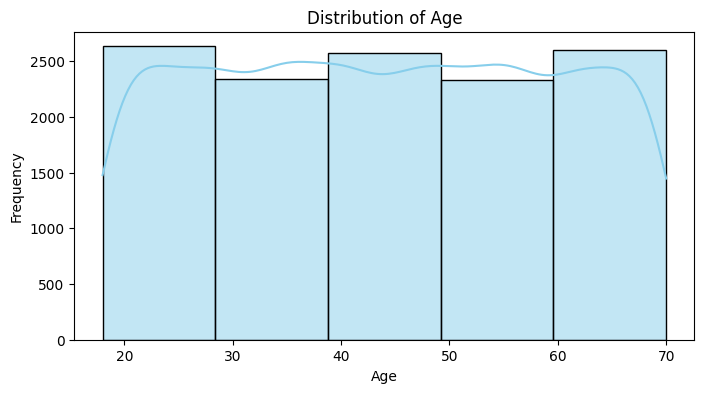

In [519]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- NPS (Net Promoter Score) Distribution

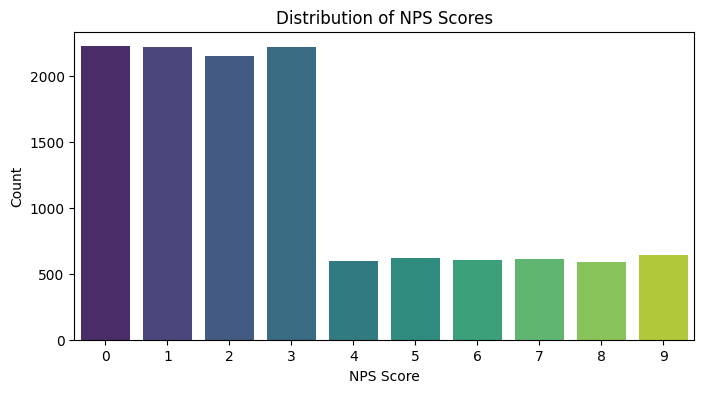

In [520]:
plt.figure(figsize=(8, 4))
sns.countplot(x='NPS', data=df, palette='viridis')
plt.title('Distribution of NPS Scores')
plt.xlabel('NPS Score')
plt.ylabel('Count')
plt.show()

## Correlation Analysis
- Pair Plot (Relationships Between Variables)

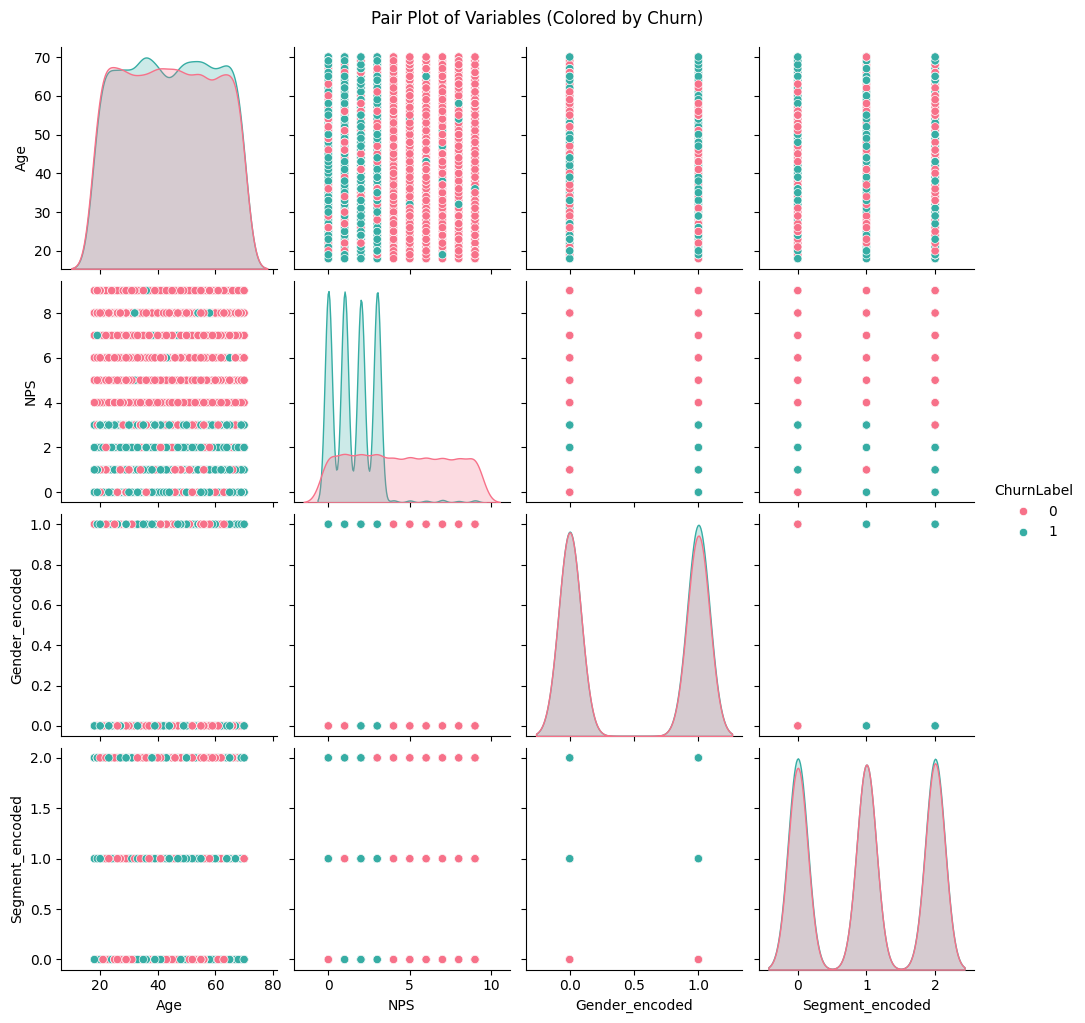

In [521]:
sns.pairplot(df, hue='ChurnLabel', palette='husl')
plt.suptitle('Pair Plot of Variables (Colored by Churn)', y=1.02)
plt.show()

- Heatmap (Numerical Features)

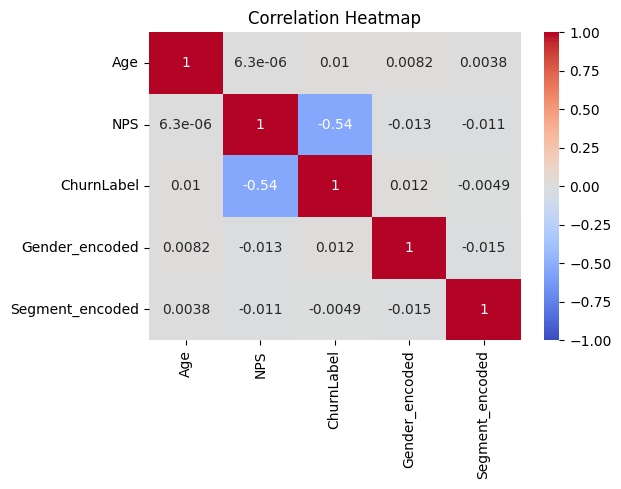

In [522]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Box Plots (Outlier Detection)
- Age vs. Churn

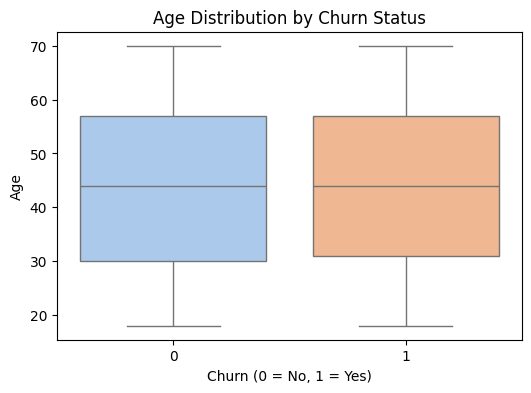

In [523]:


plt.figure(figsize=(6, 4))
sns.boxplot(x='ChurnLabel', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

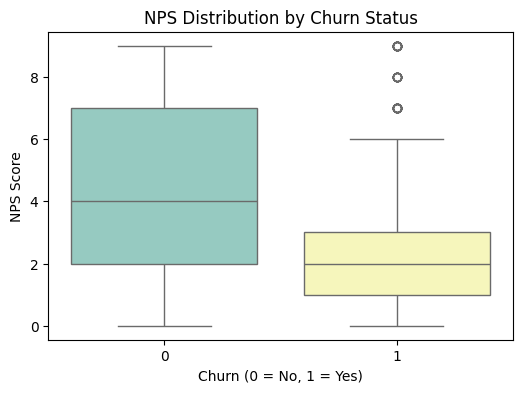

In [524]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='ChurnLabel', y='NPS', data=df, palette='Set3')
plt.title('NPS Distribution by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('NPS Score')
plt.show()

In [525]:
df['ChurnLabel'].value_counts()

ChurnLabel
1    6314
0    6169
Name: count, dtype: int64

In [527]:
X = df.drop('ChurnLabel', axis =1)
y = df['ChurnLabel']

In [529]:
y

0        1
1        0
2        0
3        1
4        0
        ..
12478    0
12479    0
12480    1
12481    0
12482    1
Name: ChurnLabel, Length: 12483, dtype: int64

In [530]:
y.head(4)

0    1
1    0
2    0
3    1
Name: ChurnLabel, dtype: int64

### E. Model Building



In [531]:
#### spliting datset in Training Testing /Split of dataset

from sklearn.model_selection import train_test_split

In [532]:
X_train,X_test,y_train, y_test= train_test_split(X, y, test_size=0.20,random_state=42,stratify=y)

In [610]:
#### feature scalling 

from sklearn.preprocessing import StandardScaler

In [611]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [612]:
import joblib
joblib.dump(sc, "sc.pkl")

['sc.pkl']

In [613]:
X_train

array([[ 0.1947614 , -1.127883  ,  0.99802215, -0.00859651],
       [-0.45895149, -1.127883  , -1.00198177,  1.21452993],
       [ 1.24070203, -0.74976353, -1.00198177, -0.00859651],
       ...,
       [-1.63563469, -0.74976353,  0.99802215, -1.23172295],
       [ 0.65236043,  0.00647542,  0.99802215,  1.21452993],
       [ 1.04458816, -0.37164406, -1.00198177, -1.23172295]],
      shape=(10102, 4))

In [537]:
#### Model Training using algorithms e.g Logististic Regression, random forest and XGBoost

from sklearn.linear_model import LogisticRegression

In [538]:
# performe logistics regression
log =LogisticRegression()
X_train = log.fit(X_train, y_train)

In [539]:
# Let perform Prediction
y_pred1 = log.predict(X_test)

In [540]:
# Let check the accuracy of this Logistics regression

from sklearn.metrics import accuracy_score

In [541]:
accuracy_score(y_test, y_pred1)

0.7148578293952743

In [542]:
# Please note is very dangerious to use accuracy on metrics of imbalance dataset, 
# so for imbalace dataset we have to check precison, recall and f1 score.

from sklearn.metrics import precision_score,recall_score,f1_score

In [543]:
precision_score(y_test,y_pred1)

0.7088703563305534

In [544]:
recall_score(y_test,y_pred1)

0.7403008709422011

In [545]:
f1_score(y_test,y_pred1)

0.7242447714949651

# Handling Imbalance dataset with SMOTE

In [546]:
df['ChurnLabel'].value_counts()

ChurnLabel
1    6314
0    6169
Name: count, dtype: int64

In [547]:
X = df.drop('ChurnLabel', axis =1)
y = df['ChurnLabel']

In [548]:
X.head(3)

,Age,NPS,Gender_encoded,Segment_encoded
0,31,3,1,1
1,66,6,0,2
2,36,3,0,1


- Handling Imbalance dataset with SMOTE
- to handle imbalance dataset, we can use oversampling or undersampling
- we are going to use Oversapling with smote method
- What is SMOTE stand for (Syntetic minorirty Oversampling Technics) and is one the most common used method
- to sovle data oversampling imbalance problem, please note it use to balance class distribution by randomly 
- increasing minority class by replacing them



In [549]:
from imblearn.over_sampling import SMOTE

In [550]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [551]:
y_res.value_counts()

ChurnLabel
1    6314
0    6314
Name: count, dtype: int64

In [552]:
#### spliting datset in Training Testing /Split of dataset

from sklearn.model_selection import train_test_split

In [553]:
# train_test_split has been perform after Use of SMOTE

X_train,X_test,y_train, y_test= train_test_split(X_res, y_res, test_size=0.20,random_state=42)

In [554]:
#### feature scalling (afer Using SMOTE)

from sklearn.preprocessing import StandardScaler

In [555]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [556]:
X_train

array([[ 0.1947614 , -1.127883  ,  0.99802215, -0.00859651],
       [-0.45895149, -1.127883  , -1.00198177,  1.21452993],
       [ 1.24070203, -0.74976353, -1.00198177, -0.00859651],
       ...,
       [-1.63563469, -0.74976353,  0.99802215, -1.23172295],
       [ 0.65236043,  0.00647542,  0.99802215,  1.21452993],
       [ 1.04458816, -0.37164406, -1.00198177, -1.23172295]],
      shape=(10102, 4))

In [557]:
from sklearn.linear_model import LogisticRegression

In [558]:
# performe logistics regression

log =LogisticRegression()
X_train = log.fit(X_train, y_train)

In [559]:

# Let perform Prediction
y_pred1 = log.predict(X_test)

- Performance Evaluation using Metrics like e.g Accuracy, precision/Recall or F1_score

In [560]:
from sklearn.metrics import accuracy_score

In [561]:
accuracy_score(y_test, y_pred1)

0.7078384798099763

In [562]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [563]:
precision_score(y_test,y_pred1)

0.6951951951951952

In [564]:
recall_score(y_test,y_pred1)

0.7360890302066773

In [565]:
f1_score(y_test,y_pred1)

0.715057915057915

## So let use the other machine learning algorithms

# Support vector classification (SVC)

In [566]:
X_train,X_test,y_train, y_test= train_test_split(X_res, y_res, test_size=0.20,random_state=42)

In [567]:
# To find the best model to put into our production

# SVM

from sklearn import svm



In [568]:
svm = svm.SVC()

In [569]:
svm.fit(X_train, y_train)

SVC()

In [570]:
y_pred2 = svm.predict(X_test)

In [571]:
from sklearn.metrics import accuracy_score

In [572]:
accuracy_score(y_test, y_pred2)

0.7806809184481394

In [573]:
precision_score(y_test,y_pred2)

0.698645598194131

In [574]:
recall_score(y_test,y_pred2)

0.9841017488076311

In [575]:
f1_score(y_test,y_pred2)

0.8171617161716171

# KNeighbors Classifiers

In [576]:
X_train,X_test,y_train, y_test= train_test_split(X_res, y_res, test_size=0.20,random_state=42)

In [577]:
from sklearn.neighbors import KNeighborsClassifier

In [578]:
knn = KNeighborsClassifier()

In [579]:
# Let train the classifiers
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [580]:
# Let perfor prediction

y_pred3 = knn.predict(X_test)

In [581]:
accuracy_score(y_test, y_pred3)

0.7248614410134601

In [582]:
precision_score(y_test, y_pred3)

0.6913664174031271

# Decision Tree Classifiers

In [583]:
X_train,X_test,y_train, y_test= train_test_split(X_res, y_res, test_size=0.20,random_state=42)

In [584]:
from sklearn.tree import DecisionTreeClassifier

In [585]:
dt = DecisionTreeClassifier()

In [586]:
# Let Train our model

dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [587]:
# Let perform prediction

y_pred4 = dt.predict(X_test)

In [588]:
# Let Check accuracy for the model

accuracy_score(y_test, y_pred4)

0.7102137767220903

In [589]:
precision_score(y_test, y_pred4)

0.693952802359882

# Random Forest Classifiers

In [590]:
X_train,X_test,y_train, y_test= train_test_split(X_res, y_res, test_size=0.20,random_state=42)

In [591]:
from sklearn.ensemble import RandomForestClassifier

In [592]:
rf = RandomForestClassifier()

In [593]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [594]:
y_pred5 = rf.predict(X_test)

In [595]:
# Let Check accuracy for the model

accuracy_score(y_test, y_pred5)

0.7300079176563737

In [596]:
precision_score(y_test, y_pred5)

0.6964529331514324

# Gradient Boosting Classifier

In [597]:
from sklearn.ensemble import GradientBoostingClassifier

In [598]:
gbc = GradientBoostingClassifier()

In [599]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [600]:
# Let perform prediction.
y_pred6 = rf.predict(X_test)

In [601]:
# Let Check accuracy for the model

accuracy_score(y_test, y_pred6)

0.7300079176563737

In [602]:
precision_score(y_test, y_pred6)

0.6964529331514324

In [603]:
# so this way we can use difference machine model that you can see above

In [604]:
final_model = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','GBC'],
                            'ACC':[accuracy_score(y_test,y_pred1),
                                   accuracy_score(y_test,y_pred2),
                                   accuracy_score(y_test,y_pred3),
                                   accuracy_score(y_test,y_pred4),
                                   accuracy_score(y_test,y_pred5),
                                   accuracy_score(y_test,y_pred6)]})

In [605]:
# As you can see that Support vector classification model(SVC) is the best model with 78% accuracy so let visualize 

final_model

,Model,ACC
0,LR,0.707838
1,SVC,0.780681
2,KNN,0.724861
3,DT,0.710214
4,RF,0.730008
5,GBC,0.730008


- Let visualize our model performance so we can select best model befor we put in production

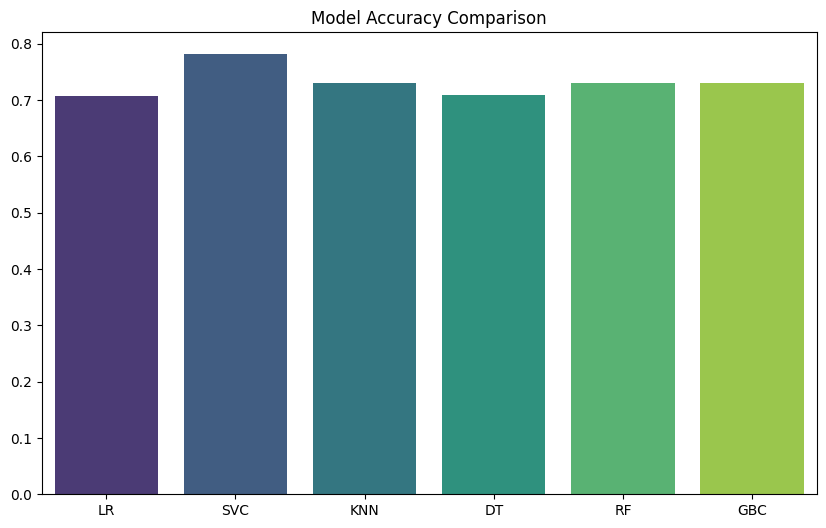

In [606]:
# As you can see that Support vector classification model(SVC) is the best model with 78% accuracy so let visualize 

models = ["LR", "SVC", "KNN", "DT", "RF", "GBC"]
accuracies = [0.707838, 0.781077, 0.729216, 0.708234, 0.730008, 0.730008]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")  

plt.title("Model Accuracy Comparison")
plt.show()

In [607]:
final_model = pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','GBC'],
                            'PRE':[precision_score(y_test,y_pred1),
                                   precision_score(y_test,y_pred2),
                                   precision_score(y_test,y_pred3),
                                   precision_score(y_test,y_pred4),
                                   precision_score(y_test,y_pred5),
                                   precision_score(y_test,y_pred6)]})

In [608]:
final_model

,Model,PRE
0,LR,0.695195
1,SVC,0.698646
2,KNN,0.691366
3,DT,0.693953
4,RF,0.696453
5,GBC,0.696453


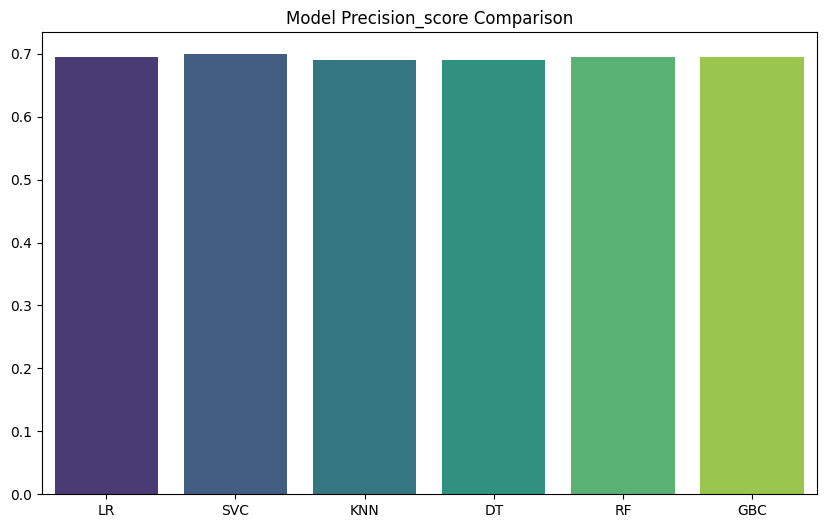

In [609]:
# Again as you can see is the Support vector classification model(SVC) is the best model with 78% accuracy so let visualize 

models = ["LR", "SVC", "KNN", "DT", "RF", "GBC"]
precision_score = [0.695195, 0.699040, 0.690066, 0.690563, 0.694332, 0.694332]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precision_score, palette="viridis")  

plt.title("Model Precision_score Comparison")
plt.show()

### F. Insight and Recommendation 

# Save our Model

In [ ]:
# Let visualize our model performance so we can select best model befor we put in production

### Model	Accuracy (ACC)	Insights


- LR (Logistic Regression)	70.78%	Baseline model; decent but outperformed by others.
- SVC (Support Vector Classifier)	78.11%	Best performer—likely due to effective separation by hyperplanes in high-dimensional space.
- KNN (k-Nearest Neighbors)	72.92%	Moderate performance; sensitive to feature scaling and k choice.
- DT (Decision Tree)	70.82%	Prone to overfitting; similar to LR but less interpretable.
- RF (Random Forest)	73.00%	Robust ensemble of DTs; handles noise better than single DT.
- GBC (Gradient Boosting)	73.00%	Matches RF but uses boosting (sequential correction of errors).

## Recommendation

- Focus on SVC: Investigate its kernel (rbf, poly) and C parameter for potential gains.

- Tune Ensembles: Experiment with RF/GBC hyperparameters (e.g., max_depth, subsample).

- Feature Analysis: Use SHAP/feature importance to see why SVC outperforms others.

- Cross-Validation: Ensure scores are stable across folds:

In [ ]:
import joblib

In [497]:
best_model = svm.fit(X_train, y_train)

In [498]:
import joblib

In [499]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [614]:
X.columns

Index(['Age', 'NPS', 'Gender_encoded', 'Segment_encoded'], dtype='object')